In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

# Plotting and Visualization

There are a handful of third-party Python packages that are suitable for creating scientific plots and visualizations. These include packages like:

* matplotlib
* Chaco
* PyX
* Bokeh

Here, we will focus excelusively on matplotlib and the high-level plotting availabel within pandas. It is currently the most robust and feature-rich package available.

### Visual representation of data

We require plots, charts and other statistical graphics for the written communication of quantitative ideas.

They allow us to more easily convey relationships and reveal deviations from patterns.

Gelman and Unwin 2011:

> A well-designed graph can display more information than a table of the same size, and more information than numbers embedded in text. Graphical displays allow and encourage direct visual comparisons.

## Matplotlib

The easiest way to interact with matplotlib is via `pylab` in iPython. By starting iPython (or iPython notebook) in "pylab mode", both matplotlib and numpy are pre-loaded into the iPython session:

    ipython notebook --pylab
    
You can specify a custom graphical backend (*e.g.* qt, gtk, osx), but iPython generally does a good job of auto-selecting. Now matplotlib is ready to go, and you can access the matplotlib API via `plt`. If you do not start iPython in pylab mode, you can do this manually with the following convention:

    import matplotlib.pyplot as plt

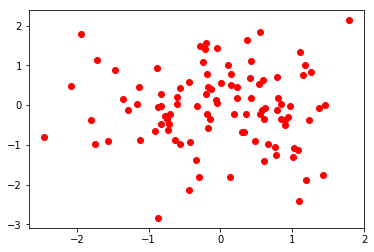

In [18]:
plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'ro')

The above plot simply shows two sets of random numbers taken from a normal distribution plotted against one another. The `'ro'` argument is a shorthand argument telling matplotlib that I wanted the points represented as red circles.

This plot was expedient. We can exercise a little more control by breaking the plotting into a workflow:

matplotlib is a relatively low-level plotting package, relative to others. It makes very few assumptions about what constitutes good layout (by design), but has a lot of flexiblility to allow the user to completely customize the look of the output.

If you want to make your plots look pretty like mine, steal the *matplotlibrc* file from [Huy Nguyen](http://www.huyng.com/posts/sane-color-scheme-for-matplotlib/).

## Plotting in Pandas

On the other hand, Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

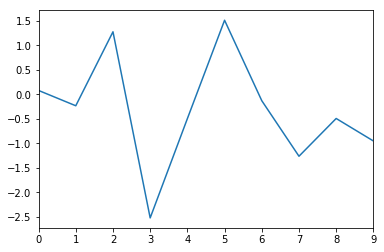

In [19]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

Notice that by default a line plot is drawn, and a light grid is included. All of this can be changed, however:

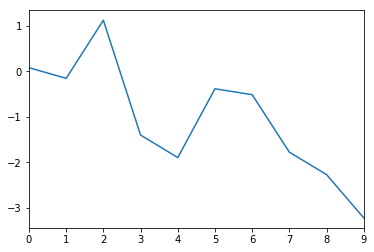

In [20]:
normals.cumsum().plot(grid=False)

Similarly, for a DataFrame:

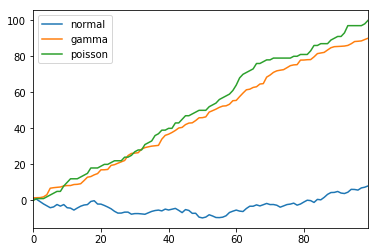

In [21]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for `plot`:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f48226f0940>,
      dtype=object)

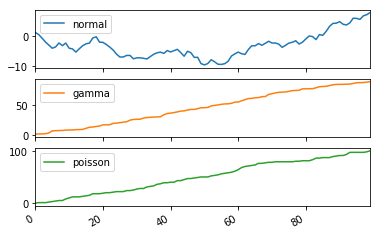

In [22]:
variables.cumsum(0).plot(subplots=True)

Or, we may want to have some series displayed on the secondary y-axis, which can allow for greater detail and less empty space:

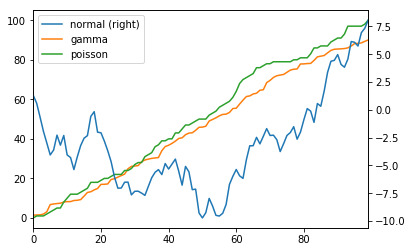

In [23]:
variables.cumsum(0).plot(secondary_y='normal')

If we would like a little more control, we can use matplotlib's `subplots` function directly, and manually assign plots to its axes:

Text(0, 0.5, 'cumulative sum')

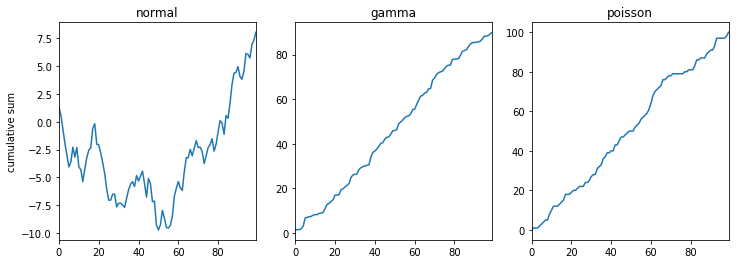

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')